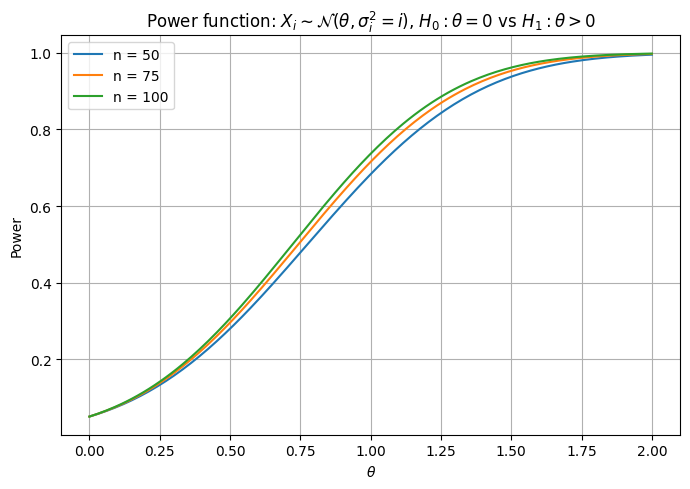

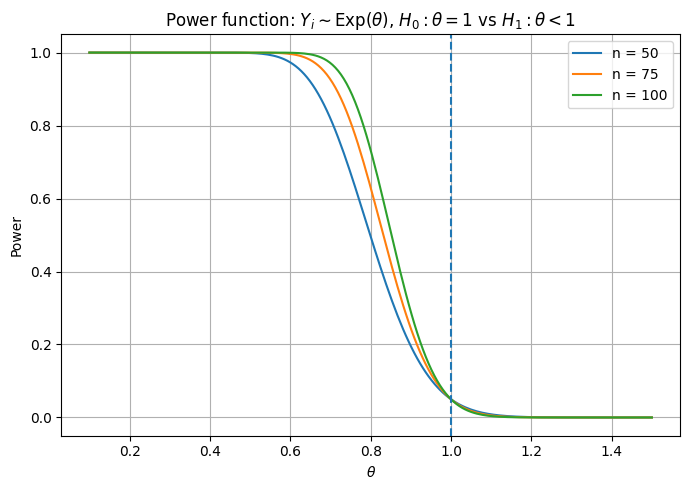

In [ ]:
# I used Copilot to generate the plots and debug my code

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

alpha = 0.05
ns = [50, 75, 100]

# 1)

def power_normal(theta, n, alpha=0.05):
    I_n = np.sum(1.0 / np.arange(1, n + 1))

    z_alpha = stats.norm.ppf(1 - alpha)
    c = np.sqrt(I_n) * z_alpha

    mean = theta * I_n
    sd = np.sqrt(I_n)

    return 1.0 - stats.norm.cdf((c - mean) / sd)


theta_grid_1 = np.linspace(0, 2.0, 200)

plt.figure(figsize=(7, 5))
for n in ns:
    powers = [power_normal(theta, n, alpha) for theta in theta_grid_1]
    plt.plot(theta_grid_1, powers, label=f"n = {n}")

plt.xlabel(r"$\theta$")
plt.ylabel("Power")
plt.title(r"Power function: $X_i \sim \mathcal{N}(\theta, \sigma_i^2=i)$, $H_0:\theta=0$ vs $H_1:\theta>0$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 2)

def power_gamma(theta, n, alpha=0.05):
    c = stats.gamma.ppf(1 - alpha, a=n, scale=1.0)
    return 1.0 - stats.gamma.cdf(c, a=n, scale=1.0 / theta)

theta_grid_2 = np.linspace(0.1, 1.5, 200)

plt.figure(figsize=(7, 5))
for n in ns:
    powers = [power_gamma(theta, n, alpha) for theta in theta_grid_2]
    plt.plot(theta_grid_2, powers, label=f"n = {n}")

plt.axvline(1.0, linestyle="--") 
plt.xlabel(r"$\theta$")
plt.ylabel("Power")
plt.title(r"Power function: $Y_i \sim \mathrm{Exp}(\theta)$, $H_0:\theta=1$ vs $H_1:\theta<1$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()